In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as stats
from scipy.stats import norm , skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold ,cross_val_score
from sklearn.model_selection import cross_val_predict

In [93]:
file_name = 'Final_Train.xlsx' 
train = pd.read_excel(file_name)

In [94]:
file_name1 = 'Final_Test.xlsx' 
test= pd.read_excel(file_name1)

In [95]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [96]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [97]:
train.shape

(5961, 7)

In [98]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [99]:
test.shape

(1987, 6)

In [100]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [101]:
all_data = pd.concat([train, test], ignore_index=True, sort =False)

In [102]:
all_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [103]:
all_data.shape

(7948, 7)

In [104]:
all_data.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

here, in this dataset there is lots of value is missing in rating variable and Miscellaneous_Info variable approx 45% is missing but we cannot ignore this feature beacuse it is very important for the model and bring in much more information from this.

In [105]:
all_data.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
dtype: object

# Data Exploration

In [106]:
train['Fees'].describe()

count    5961.000000
mean      307.944640
std       190.920373
min         5.000000
25%       150.000000
50%       300.000000
75%       500.000000
max       950.000000
Name: Fees, dtype: float64

### remove skewness from dataset by using feature transformation

In [107]:
print(train['Fees'].skew())
print(train['Fees'].kurtosis())

0.7518701683331587
-0.1620594436984688


Text(0.5, 0, 'cube-fees')

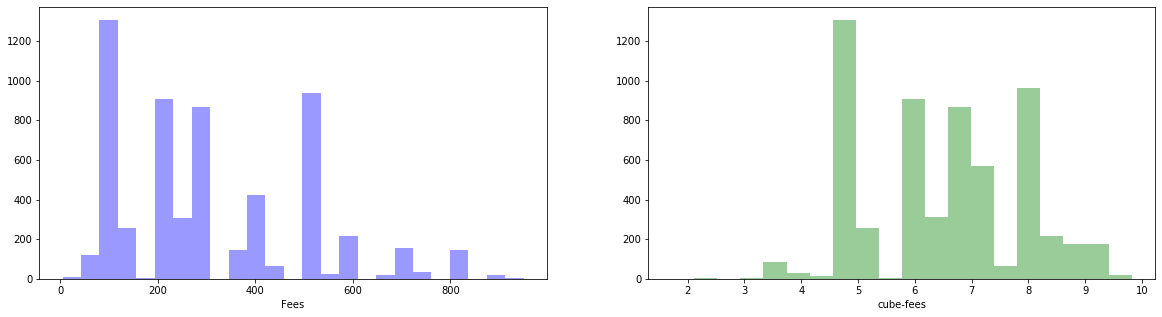

In [108]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train.Fees, ax=ax[0], kde=False, color="blue")
sns.distplot(np.cbrt(train.Fees), ax=ax[1], bins=20, color="green", kde=False)
ax[1].set_xlabel("cube-fees")

In [109]:
print(np.cbrt(train.Fees).skew())
print(np.cbrt(train.Fees).kurtosis())

0.07298083013010484
-0.9538187629276953


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

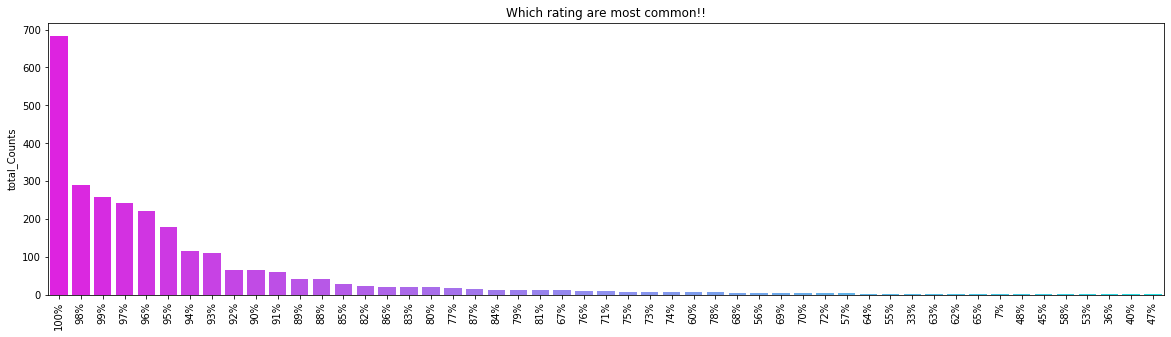

In [110]:
total_count = train.Rating.value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(total_count .index, total_count .values, palette="cool_r")
plt.ylabel("total_Counts")
plt.title("Which rating are most common!!")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

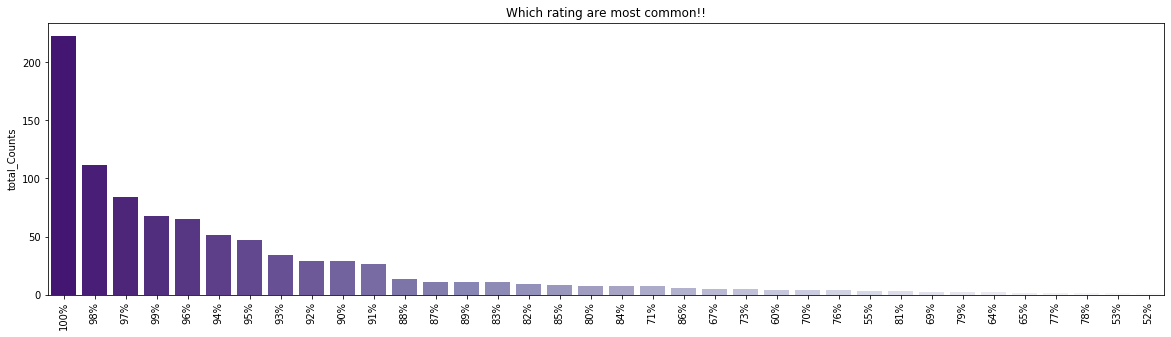

In [111]:
total_count1 = test.Rating.value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(total_count1 .index, total_count1 .values, palette="Purples_r")
plt.ylabel("total_Counts")
plt.title("Which rating are most common!!")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

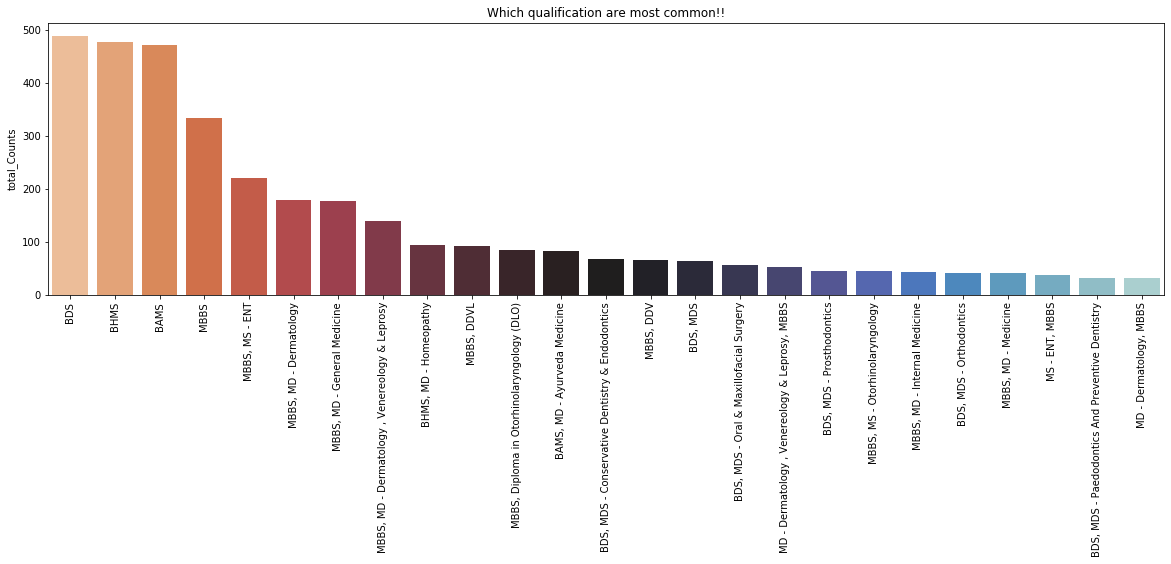

In [112]:
total_count = train.Qualification.value_counts().sort_values(ascending=False).iloc[:25]
plt.figure(figsize=(20,5))
sns.barplot(total_count .index, total_count .values, palette="icefire_r")
plt.ylabel("total_Counts")
plt.title("Which qualification are most common!!")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

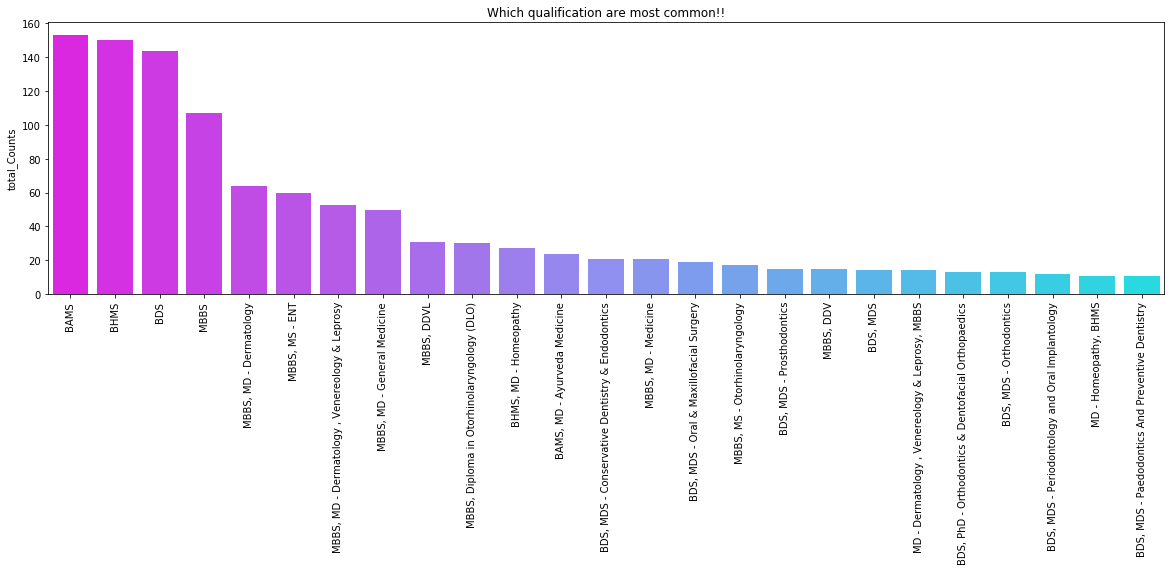

In [113]:
test_total_count = test.Qualification.value_counts().sort_values(ascending=False).iloc[:25]
plt.figure(figsize=(20,5))
sns.barplot(test_total_count .index, test_total_count .values, palette="cool_r")
plt.ylabel("total_Counts")
plt.title("Which qualification are most common!!")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

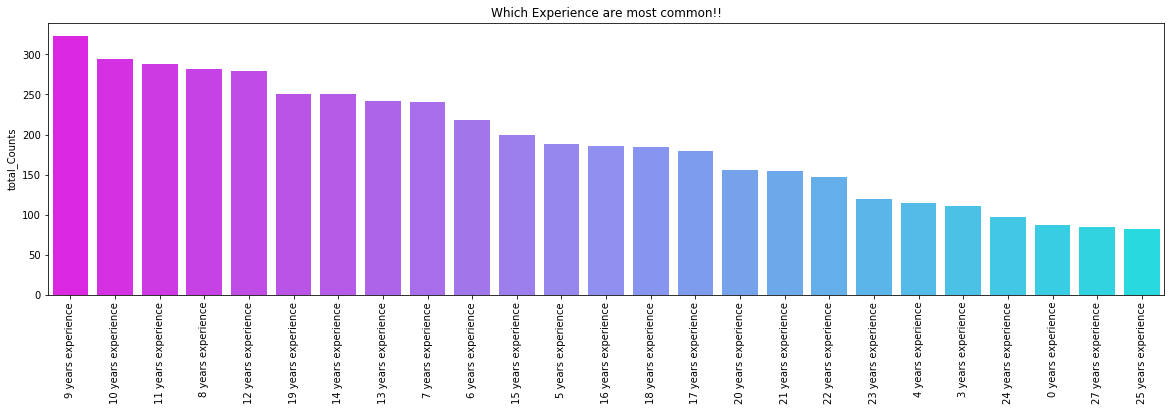

In [114]:
total_count = train.Experience.value_counts().sort_values(ascending=False).iloc[:25]
plt.figure(figsize=(20,5))
sns.barplot(total_count .index, total_count .values, palette="cool_r")
plt.ylabel("total_Counts")
plt.title("Which Experience are most common!!")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

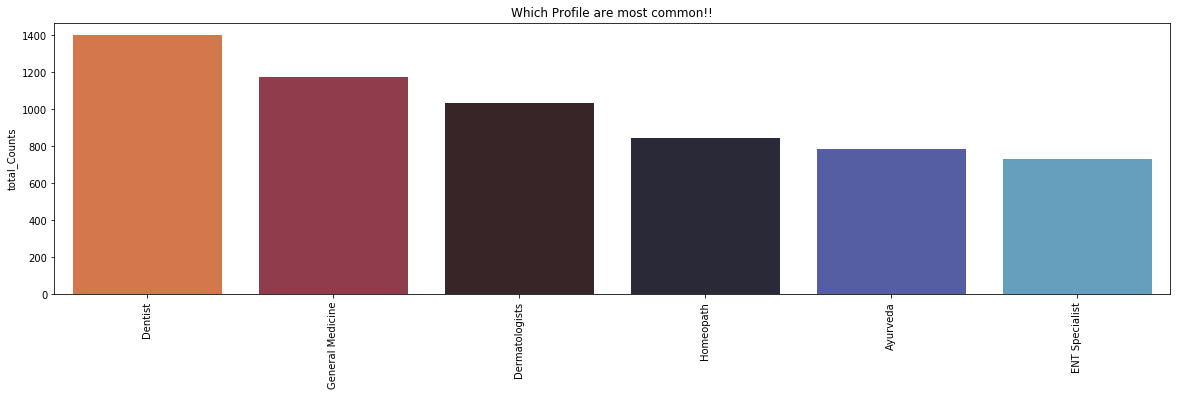

In [115]:
total_count = train.Profile.value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(total_count .index, total_count .values, palette="icefire_r")
plt.ylabel("total_Counts")
plt.title("Which Profile are most common!!")
plt.xticks(rotation=90)

here, we can see that the dentist is most common doctor in market place as campare to any other one..

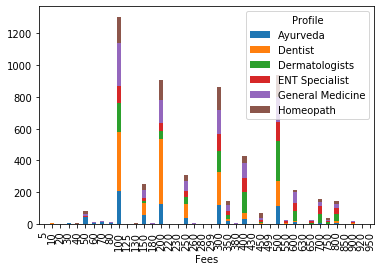

In [116]:
ct = pd.crosstab(train.Fees, train.Profile)

ct.plot.bar(stacked=True)
plt.legend(title='Profile')

plt.show()

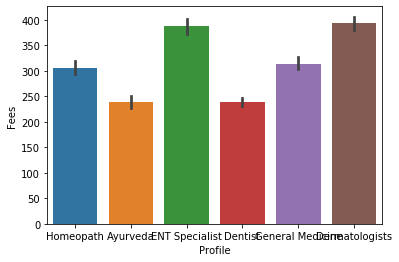

In [117]:
sns.barplot(x='Profile',y='Fees',data=train)

# missing value treatment

In [118]:
all_data['Rating'].fillna('0%',inplace=True)

In [119]:
all_data['Place'].fillna('Others',inplace=True)

In [120]:
all_data['Miscellaneous_Info'].fillna('Others',inplace=True)

In [121]:
all_data.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info       0
Fees                  1987
dtype: int64

In [122]:
all_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0%,"Mathikere - BEL, Bangalore",ENT Specialist,Others,300.0
3,"BSc - Zoology, BAMS",12 years experience,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


# Feature Generation

# 1.Experience

In [123]:
all_data['Experience']=all_data['Experience'].apply(lambda x:int( x.split(" ")[0]))

# 2. Rating

In [124]:
all_data['Rating']=all_data['Rating'].apply(lambda x:int(x[:-1]))

# 3. Place

split place feature into local and city variables and fill missing value in  created features.

In [125]:
all_data['City']=all_data['Place'].apply(lambda x : x.split(", ")[-1])
all_data['Locality']=all_data['Place'].apply(lambda x : x.split(", ")[0])
all_data['City'].fillna("XXX",inplace = True)
all_data['Locality'].fillna("XXX",inplace = True)

In [126]:
all_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,Others,300.0,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,Bangalore,Bannerghatta Road
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Chennai,Keelkattalai


# 4. Qualification

In [127]:
all_data['Qual_1'] = all_data['Qualification'].str.split(',').str[0]
all_data['Qual_2'] = all_data['Qualification'].str.split(',').str[1]
all_data['Qual_3'] = all_data['Qualification'].str.split(',').str[2]
all_data['Qual_1'].fillna("XXX",inplace = True)
all_data['Qual_2'].fillna("XXX",inplace = True)
all_data['Qual_3'].fillna("XXX",inplace = True)

In [128]:
all_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qual_1,Qual_2,Qual_3
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,XXX
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,XXX
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,Others,300.0,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,XXX
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,XXX
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Chennai,Keelkattalai,BAMS,XXX,XXX


In [129]:
all_data.shape

(7948, 12)

# 5. Profile

In [130]:
profile_dummy = pd.get_dummies(all_data.Profile)

In [131]:
profile_dummy.head()

,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [132]:
new_datas=pd.concat([all_data, profile_dummy], axis=1)

In [133]:
new_datas

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qual_1,Qual_2,Qual_3,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,XXX,0,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,XXX,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,Others,300.0,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,XXX,0,0,0,1,0,0
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,XXX,1,0,0,0,0,0
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Chennai,Keelkattalai,BAMS,XXX,XXX,1,0,0,0,0,0
5,BAMS,8,0,"Porur, Chennai",Ayurveda,Others,100.0,Chennai,Porur,BAMS,XXX,XXX,1,0,0,0,0,0
6,BHMS,42,0,"Karol Bagh, Delhi",Homeopath,Others,200.0,Delhi,Karol Bagh,BHMS,XXX,XXX,0,0,0,0,0,1
7,BDS,10,99,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200.0,Bangalore,Arekere,BDS,XXX,XXX,0,1,0,0,0,0
8,"MBBS, MD - General Medicine",14,0,"Old City, Hyderabad",General Medicine,Others,100.0,Hyderabad,Old City,MBBS,MD - General Medicine,XXX,0,0,0,0,1,0
9,"BSc, BDS",23,0,"Athani, Ernakulam",Dentist,Others,100.0,Ernakulam,Athani,BSc,BDS,XXX,0,1,0,0,0,0


In [134]:
new_datas.shape

(7948, 18)

# 6. Miscellaneous_info

This is the most important column and we will have to generate as many features as possible. If you observe the entries carefully, you’ll see that generally there’s a rating %, followed by the number of people who rated and then the doctor’s address and also given fees which is given by patient. So, we can split it into 3 variables.

In [135]:
new_datas['Misc_1'] = new_datas['Miscellaneous_Info'].str.split('%').str[0]
new_datas['Misc_1_len'] = new_datas['Misc_1'].str.len()
new_datas.loc[new_datas['Misc_1_len']>3, 'Misc_1'] = 0
new_datas['Misc_1'].fillna(0,inplace = True)
new_datas['Misc_1'] = new_datas['Misc_1'].astype(int)
new_datas['Misc_2'] = new_datas['Miscellaneous_Info'].str.split('% ').str[1]
new_datas['Misc_3'] = new_datas['Misc_2'].str.split(' ').str[0]
new_datas['Misc_3'].fillna(0,inplace = True)
new_datas['Misc_3_len'] = new_datas['Misc_3'].str.len()
new_datas.loc[new_datas['Misc_3_len']>3, 'Misc_3'] = 0
new_datas.loc[new_datas['Misc_3']==',', 'Misc_3'] = 0
new_datas['Misc_3'] = new_datas['Misc_3'].astype(int)

In [136]:
new_datas.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qual_1,...,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Misc_1,Misc_1_len,Misc_2,Misc_3,Misc_3_len
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Ernakulam,Kakkanad,BHMS,...,0,0,0,0,1,100,3,"16 Feedback Kakkanad, Ernakulam",16,2.0
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Bangalore,Whitefield,BAMS,...,0,0,0,0,0,98,2,"76 Feedback Whitefield, Bangalore",76,2.0
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,Others,300.0,Bangalore,Mathikere - BEL,MBBS,...,0,0,1,0,0,0,6,NaN,0,NaN
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,Bangalore,Bannerghatta Road,BSc - Zoology,...,0,0,0,0,0,0,58,NaN,0,NaN
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Chennai,Keelkattalai,BAMS,...,0,0,0,0,0,100,3,"4 Feedback Keelkattalai, Chennai",4,1.0


In [137]:
new_datas.Miscellaneous_Info = new_datas.Miscellaneous_Info.str.replace('₹', 'INR ')

In [138]:
import re

In [139]:
def find_fee(data):
    result = re.search(r'INR (\d*)',data)
    if result:
        return int(result.group(1))
    else:
        return 0

In [140]:
new_datas['fees_value'] = new_datas.Miscellaneous_Info.apply(lambda x: find_fee(x) if 'INR' in str(x) else 0)

In [141]:
new_datas.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qual_1,...,Dermatologists,ENT Specialist,General Medicine,Homeopath,Misc_1,Misc_1_len,Misc_2,Misc_3,Misc_3_len,fees_value
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Ernakulam,Kakkanad,BHMS,...,0,0,0,1,100,3,"16 Feedback Kakkanad, Ernakulam",16,2.0,0
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Bangalore,Whitefield,BAMS,...,0,0,0,0,98,2,"76 Feedback Whitefield, Bangalore",76,2.0,0
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,Others,300.0,Bangalore,Mathikere - BEL,MBBS,...,0,1,0,0,0,6,NaN,0,NaN,0
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250.0,Bangalore,Bannerghatta Road,BSc - Zoology,...,0,0,0,0,0,58,NaN,0,NaN,250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Chennai,Keelkattalai,BAMS,...,0,0,0,0,100,3,"4 Feedback Keelkattalai, Chennai",4,1.0,0


In [142]:
new_datas['City'].value_counts()

Bangalore             1678
Mumbai                1608
Delhi                 1602
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
Others                  31
e                        1
Name: City, dtype: int64

In [143]:
# Define function to dummify feature

def get_dummies(dataframe,feature_name):
    
    dummy = pd.get_dummies(dataframe[feature_name], prefix=feature_name)
    dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
    return pd.concat([dataframe,dummy], axis = 1)

In [144]:
new_datas = get_dummies(new_datas, 'City')


In [145]:
new_datas.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qual_1,...,fees_value,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Others,City_Thiruvananthapuram,City_e
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Ernakulam,Kakkanad,BHMS,...,0,0,0,0,1,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Bangalore,Whitefield,BAMS,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,Others,300.0,Bangalore,Mathikere - BEL,MBBS,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250.0,Bangalore,Bannerghatta Road,BSc - Zoology,...,250,0,0,0,0,0,0,0,0,0
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Chennai,Keelkattalai,BAMS,...,0,1,0,0,0,0,0,0,0,0


In [146]:
# Define function to label encode the selected categorical variable for modeling

def encode(data):
    return data.astype('category').cat.codes

In [147]:
# Encode Locality column of test data

columns = ['Locality']

for i in columns:
    col = i+"_code"
    new_datas[col] = encode(new_datas[i])

In [148]:
new_datas.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qual_1,...,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Others,City_Thiruvananthapuram,City_e,Locality_code
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Ernakulam,Kakkanad,BHMS,...,0,0,0,1,0,0,0,0,0,324
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Bangalore,Whitefield,BAMS,...,0,0,0,0,0,0,0,0,0,926
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,Others,300.0,Bangalore,Mathikere - BEL,MBBS,...,0,0,0,0,0,0,0,0,0,494
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250.0,Bangalore,Bannerghatta Road,BSc - Zoology,...,0,0,0,0,0,0,0,0,0,74
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Chennai,Keelkattalai,BAMS,...,1,0,0,0,0,0,0,0,0,367


In [149]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [150]:
new_datas["Qual_1"] = le.fit_transform(new_datas["Qual_1"])
new_datas["Qual_2"] = le.fit_transform(new_datas["Qual_2"])
new_datas["Qual_3"] = le.fit_transform(new_datas["Qual_3"])

In [151]:
new_datas.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qual_1,...,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Others,City_Thiruvananthapuram,City_e,Locality_code
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Ernakulam,Kakkanad,8,...,0,0,0,1,0,0,0,0,0,324
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Bangalore,Whitefield,5,...,0,0,0,0,0,0,0,0,0,926
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,Others,300.0,Bangalore,Mathikere - BEL,101,...,0,0,0,0,0,0,0,0,0,494
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250.0,Bangalore,Bannerghatta Road,14,...,0,0,0,0,0,0,0,0,0,74
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Chennai,Keelkattalai,5,...,1,0,0,0,0,0,0,0,0,367


In [152]:
new_datas.dtypes

Qualification               object
Experience                   int64
Rating                       int64
Place                       object
Profile                     object
Miscellaneous_Info          object
Fees                       float64
City                        object
Locality                    object
Qual_1                       int32
Qual_2                       int32
Qual_3                       int32
Ayurveda                     uint8
Dentist                      uint8
Dermatologists               uint8
ENT Specialist               uint8
General Medicine             uint8
Homeopath                    uint8
Misc_1                       int32
Misc_1_len                   int64
Misc_2                      object
Misc_3                       int32
Misc_3_len                 float64
fees_value                   int64
City_Chennai                 uint8
City_Coimbatore              uint8
City_Delhi                   uint8
City_Ernakulam               uint8
City_Hyderabad      

# drop unwanted columns from all_data

In [153]:
new_datas.drop(["Qualification",'Place','Profile','Miscellaneous_Info',
                'City','Locality','Misc_2','Misc_1_len','Misc_3_len'],axis=1,inplace=True)

In [154]:
new_datas.head()

,Experience,Rating,Fees,Qual_1,Qual_2,Qual_3,Ayurveda,Dentist,Dermatologists,ENT Specialist,...,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Others,City_Thiruvananthapuram,City_e,Locality_code
0,24,100,100.0,8,293,481,0,0,0,0,...,0,0,0,1,0,0,0,0,0,324
1,12,98,350.0,5,282,481,1,0,0,0,...,0,0,0,0,0,0,0,0,0,926
2,9,0,300.0,101,383,481,0,0,0,1,...,0,0,0,0,0,0,0,0,0,494
3,12,0,250.0,14,10,481,1,0,0,0,...,0,0,0,0,0,0,0,0,0,74
4,20,100,250.0,5,495,481,1,0,0,0,...,1,0,0,0,0,0,0,0,0,367


In [155]:
new_datas.dtypes

Experience                   int64
Rating                       int64
Fees                       float64
Qual_1                       int32
Qual_2                       int32
Qual_3                       int32
Ayurveda                     uint8
Dentist                      uint8
Dermatologists               uint8
ENT Specialist               uint8
General Medicine             uint8
Homeopath                    uint8
Misc_1                       int32
Misc_3                       int32
fees_value                   int64
City_Chennai                 uint8
City_Coimbatore              uint8
City_Delhi                   uint8
City_Ernakulam               uint8
City_Hyderabad               uint8
City_Mumbai                  uint8
City_Others                  uint8
City_Thiruvananthapuram      uint8
City_e                       uint8
Locality_code                int16
dtype: object

In [156]:
new_datas.isnull().sum()

Experience                    0
Rating                        0
Fees                       1987
Qual_1                        0
Qual_2                        0
Qual_3                        0
Ayurveda                      0
Dentist                       0
Dermatologists                0
ENT Specialist                0
General Medicine              0
Homeopath                     0
Misc_1                        0
Misc_3                        0
fees_value                    0
City_Chennai                  0
City_Coimbatore               0
City_Delhi                    0
City_Ernakulam                0
City_Hyderabad                0
City_Mumbai                   0
City_Others                   0
City_Thiruvananthapuram       0
City_e                        0
Locality_code                 0
dtype: int64

# create target and input variable

In [157]:
new_train=new_datas[:5961]
new_test=new_datas[5961:]
new_test.drop('Fees',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [158]:
X= new_train.drop('Fees',axis=1)
y= np.cbrt(new_train.Fees)

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 40)

# Modelling

# 1. linear regression

In [160]:
lr= LinearRegression()

In [161]:
kfold= KFold(n_splits=50, shuffle=True,random_state=90)

In [162]:
def cv_rmse(model):
    rmse=np.sqrt(-cross_val_score(model,X,y, scoring = "neg_mean_squared_error",cv=kfold))
    return(rmse)

In [163]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [164]:
bench_model= make_pipeline(RobustScaler(),lr).fit(X=X_train, y=y_train)
cv_rmse(bench_model).mean()

1.2749957101822116

## find best parametrers using GridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [168]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import mean_squared_error
    #print(model,parameters)
    
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True, n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_RMSE = mean_squared_error(y_test, y_pred, squared=False)
    train_RMSE = mean_squared_error(y_train, train_y_pred, squared=False)
    
    fig, ax = plt.subplots()
    cube_y_pred= np.power(y_pred, 3)
    cube_y_test= np.power(y_test, 3)
    ax.scatter(cube_y_test, cube_y_pred)
    ax.plot([cube_y_test.min(), cube_y_test.max()], [cube_y_test.min(), cube_y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_RMSE across ALL models:\n",
          train_RMSE)
                                    
    print("\n The test_RMSE across ALL models:\n",
          test_RMSE) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************
[14:07:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

 The best score across ALL searched params:
 0.2305106936857087

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500, 'subsample': 

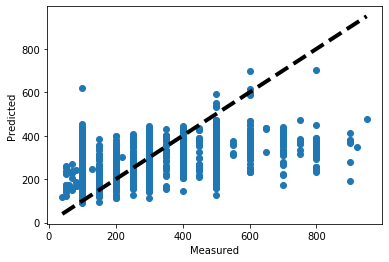

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.23109486151999042

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estim

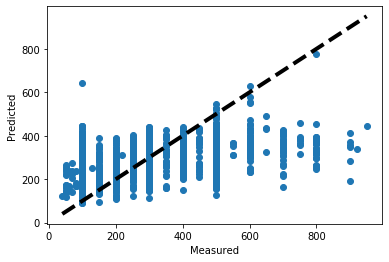

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.19964607403218804

 The best parameters across ALL searched params:
 {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 40}

 The train_RMSE across ALL models:
 1.1295621281449657

 The test_RMSE across ALL models:
 1.2240252427841558


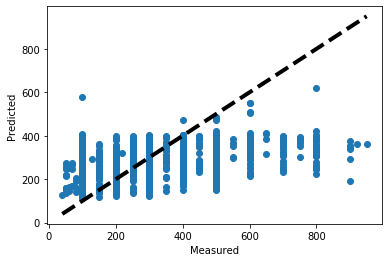

None



In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
alg = [XGBRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8,10]},
                
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8,10]},
              {'max_depth'    : [4,6,8,10],
              'n_estimators' : [100,500,1000],
              'min_samples_leaf':[1,2,3,4],
              'random_state': [35,40,45,50]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

### bar plot of features importances

[14:10:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


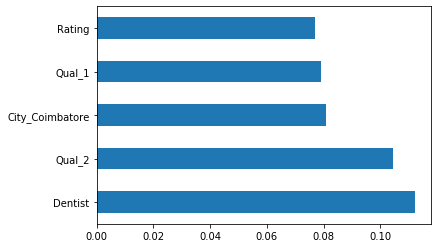

In [170]:
model = XGBRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

# save model

In [186]:
import pickle

In [187]:
filename='doc_XGBRegressor_model.sav'

In [188]:
pickle.dump(model, open(filename, 'wb'))

In [189]:
load_lr_model =pickle.load(open(filename, 'rb'))

[14:11:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [190]:
cols_when_model_builds = model.get_booster().feature_names

In [191]:
cols_when_model_builds

['Experience',
 'Rating',
 'Qual_1',
 'Qual_2',
 'Qual_3',
 'Ayurveda',
 'Dentist',
 'Dermatologists',
 'ENT Specialist',
 'General Medicine',
 'Homeopath',
 'Misc_1',
 'Misc_3',
 'fees_value',
 'City_Chennai',
 'City_Coimbatore',
 'City_Delhi',
 'City_Ernakulam',
 'City_Hyderabad',
 'City_Mumbai',
 'City_Others',
 'City_Thiruvananthapuram',
 'City_e',
 'Locality_code']

In [192]:
new_test = new_test[cols_when_model_builds]

In [193]:
new_test.head()

,Experience,Rating,Qual_1,Qual_2,Qual_3,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,...,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Others,City_Thiruvananthapuram,City_e,Locality_code
5961,35,0,101,495,481,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,217
5962,31,0,101,159,481,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,924
5963,40,70,101,65,481,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,314
5964,0,0,5,495,481,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,573
5965,16,100,6,328,481,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,340


# predict test data

In [194]:
y_load_predit=load_lr_model.predict(new_test)

In [195]:
y_load_predit

array([5.8825827, 6.404361 , 7.045031 , ..., 6.541304 , 5.863395 ,
       7.9211974], dtype=float32)

In [196]:
cube_y_test= np.power(y_load_predit, 3)

In [197]:
new_test['Fees'] = cube_y_test

In [198]:
new_test.head()

,Experience,Rating,Qual_1,Qual_2,Qual_3,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,...,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Others,City_Thiruvananthapuram,City_e,Locality_code,Fees
5961,35,0,101,495,481,0,0,0,0,1,...,0,0,0,0,1,0,0,0,217,203.565475
5962,31,0,101,159,481,0,0,0,1,0,...,0,0,0,1,0,0,0,0,924,262.680206
5963,40,70,101,65,481,0,0,1,0,0,...,0,0,0,0,0,0,0,0,314,349.662231
5964,0,0,5,495,481,1,0,0,0,0,...,0,1,0,0,0,0,0,0,573,187.911194
5965,16,100,6,328,481,0,1,0,0,0,...,0,0,0,0,0,0,0,0,340,252.600235


In [199]:
predi_fees = pd.DataFrame(columns=['Fees'])

In [200]:
predi_fees['Fees']= new_test['Fees']

In [201]:
predi_fees.head()

,Fees
5961,203.565475
5962,262.680206
5963,349.662231
5964,187.911194
5965,252.600235


# create csv file of doctor's fees  prediction.

In [202]:
predi_fees.to_csv('predict_doc_fees.csv',index=False)